In [32]:
import pandas as pd
import numpy as np

data = pd.read_csv("Chicago_Crimes_2012_to_2017.csv/Chicago_Crimes_2012_to_2017.csv")
print (data.head())

   Unnamed: 0        ID Case Number            Date                Block IUCR  \
0           3  10508693    HZ250496  5/3/2016 23:40   013XX S SAWYER AVE  486   
1          89  10508695    HZ250409  5/3/2016 21:40   061XX S DREXEL AVE  486   
2         197  10508697    HZ250503  5/3/2016 23:31  053XX W CHICAGO AVE  470   
3         673  10508698    HZ250424  5/3/2016 22:10    049XX W FULTON ST  460   
4         911  10508699    HZ250455  5/3/2016 22:00    003XX N LOTUS AVE  820   

             Primary_Type              Description Location_Description  \
0                 BATTERY  DOMESTIC BATTERY SIMPLE            APARTMENT   
1                 BATTERY  DOMESTIC BATTERY SIMPLE            RESIDENCE   
2  PUBLIC PEACE VIOLATION         RECKLESS CONDUCT               STREET   
3                 BATTERY                   SIMPLE             SIDEWALK   
4                   THEFT           $500 AND UNDER            RESIDENCE   

   Arrest              ...                Ward  Community Area

In [33]:
len(data)

1048575

In [34]:
#Cleaning up the dataset
data.isnull().sum()
data=data.dropna()
print(len(data))
data.isnull().sum()

1039231


Unnamed: 0              0
ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary_Type            0
Description             0
Location_Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

In [35]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1039231 entries, 0 to 1048574
Data columns (total 23 columns):
Unnamed: 0              1039231 non-null int64
ID                      1039231 non-null int64
Case Number             1039231 non-null object
Date                    1039231 non-null object
Block                   1039231 non-null object
IUCR                    1039231 non-null object
Primary_Type            1039231 non-null object
Description             1039231 non-null object
Location_Description    1039231 non-null object
Arrest                  1039231 non-null bool
Domestic                1039231 non-null bool
Beat                    1039231 non-null int64
District                1039231 non-null float64
Ward                    1039231 non-null float64
Community Area          1039231 non-null float64
FBI Code                1039231 non-null object
X Coordinate            1039231 non-null float64
Y Coordinate            1039231 non-null float64
Year                    1

In [36]:
for dtype in ['float','int','object','bool']:
    selected_dtype = data.select_dtypes(include=[dtype])
    mean_usage_b = selected_dtype.memory_usage(deep=True).mean()
    mean_usage_mb = mean_usage_b / 1024 ** 2
    print("Average memory usage for {} columns: {:03.2f} MB".format(dtype,mean_usage_mb))

Average memory usage for float columns: 7.93 MB
Average memory usage for int columns: 7.93 MB
Average memory usage for object columns: 63.58 MB
Average memory usage for bool columns: 3.30 MB


In [37]:
import numpy as np
int_types = ["uint8", "int8", "int16"]
for it in int_types:
    print(np.iinfo(it))

Machine parameters for uint8
---------------------------------------------------------------
min = 0
max = 255
---------------------------------------------------------------

Machine parameters for int8
---------------------------------------------------------------
min = -128
max = 127
---------------------------------------------------------------

Machine parameters for int16
---------------------------------------------------------------
min = -32768
max = 32767
---------------------------------------------------------------



In [38]:
def mem_usage(pandas_obj):
    if isinstance(pandas_obj,pd.DataFrame):
        usage_b = pandas_obj.memory_usage(deep=True).sum()
    else: # we assume if not a df it's a series
        usage_b = pandas_obj.memory_usage(deep=True)
    usage_mb = usage_b / 1024 ** 2 # convert bytes to megabytes
    return "{:03.2f} MB".format(usage_mb)

data_float = data.select_dtypes(include=['float'])
converted_float = data_float.apply(pd.to_numeric,downcast='float')

print(mem_usage(data_float))
print(mem_usage(converted_float))

compare_floats = pd.concat([data_float.dtypes,converted_float.dtypes],axis=1)
compare_floats.columns = ['before','after']
compare_floats.apply(pd.Series.value_counts)

63.43 MB
35.68 MB


,before,after
float32,NaN,7.0
float64,7.0,NaN


In [39]:
optimized_data = data.copy()

optimized_data[converted_int.columns] = converted_int
optimized_data[converted_float.columns] = converted_float

print(mem_usage(data))
print(mem_usage(optimized_data))

788.53 MB
760.78 MB


In [40]:
data_obj = data.select_dtypes(include=['object']).copy()
data_obj.describe()

,Case Number,Date,Block,IUCR,Primary_Type,Description,Location_Description,FBI Code,Updated On,Location
count,1039231,1039231,1039231,1039231,1039231,1039231,1039231,1039231,1039231,1039231
unique,1039225,408985,31580,355,33,334,108,26,300,315560
top,HZ140230,1/1/2012 0:01,001XX N STATE ST,820,THEFT,SIMPLE,STREET,6,2/4/2016 6:33,"(41.754592961, -87.741528537)"
freq,5,126,2387,97476,234716,107887,236083,234716,906318,1589


In [41]:
converted_obj = pd.DataFrame()

for col in data_obj.columns:
    num_unique_values = len(data_obj[col].unique())
    num_total_values = len(data_obj[col])
    if num_unique_values / num_total_values < 0.5:
        converted_obj.loc[:,col] = data_obj[col].astype('category')
    else:
        converted_obj.loc[:,col] = data_obj[col]

In [42]:
print(mem_usage(data_obj))
print(mem_usage(converted_obj))

compare_obj = pd.concat([data_obj.dtypes,converted_obj.dtypes],axis=1)
compare_obj.columns = ['before','after']
compare_obj.apply(pd.Series.value_counts)

699.33 MB
178.56 MB


,before,after
object,10.0,1
category,NaN,1
category,NaN,1
category,NaN,1
category,NaN,1
category,NaN,1
category,NaN,1
category,NaN,1
category,NaN,1
category,NaN,1


In [43]:
optimized_data[converted_obj.columns] = converted_obj

mem_usage(optimized_data)

'240.01 MB'

In [44]:
print(optimized_data.head())

   Unnamed: 0        ID Case Number            Date                Block IUCR  \
0           3  10508693    HZ250496  5/3/2016 23:40   013XX S SAWYER AVE  486   
1          89  10508695    HZ250409  5/3/2016 21:40   061XX S DREXEL AVE  486   
2         197  10508697    HZ250503  5/3/2016 23:31  053XX W CHICAGO AVE  470   
3         673  10508698    HZ250424  5/3/2016 22:10    049XX W FULTON ST  460   
4         911  10508699    HZ250455  5/3/2016 22:00    003XX N LOTUS AVE  820   

             Primary_Type              Description Location_Description  \
0                 BATTERY  DOMESTIC BATTERY SIMPLE            APARTMENT   
1                 BATTERY  DOMESTIC BATTERY SIMPLE            RESIDENCE   
2  PUBLIC PEACE VIOLATION         RECKLESS CONDUCT               STREET   
3                 BATTERY                   SIMPLE             SIDEWALK   
4                   THEFT           $500 AND UNDER            RESIDENCE   

   Arrest              ...                Ward  Community Area

In [48]:
date = optimized_data.Date
print(date.head())
date = pd.to_datetime(date)

0    5/3/2016 23:40
1    5/3/2016 21:40
2    5/3/2016 23:31
3    5/3/2016 22:10
4    5/3/2016 22:00
Name: Date, dtype: category
Categories (408985, object): [1/1/2012 0:00, 1/1/2012 0:01, 1/1/2012 0:02, 1/1/2012 0:03, ..., 9/9/2015 12:32, 9/9/2015 13:43, 9/9/2015 17:35, 9/9/2015 17:56]


In [49]:
print(date.head())

0   2016-05-03 23:40:00
1   2016-05-03 21:40:00
2   2016-05-03 23:31:00
3   2016-05-03 22:10:00
4   2016-05-03 22:00:00
Name: Date, dtype: datetime64[ns]


In [70]:
optimized_data['Date'] = date.apply( lambda x : x)
print(optimized_data['Date'][0].split('-'))

AttributeError: 'Timestamp' object has no attribute 'split'

In [55]:
print(mem_usage(optimized_data))
print(mem_usage(data))

196.04 MB
788.53 MB


In [54]:
len(optimized_data)

1039231

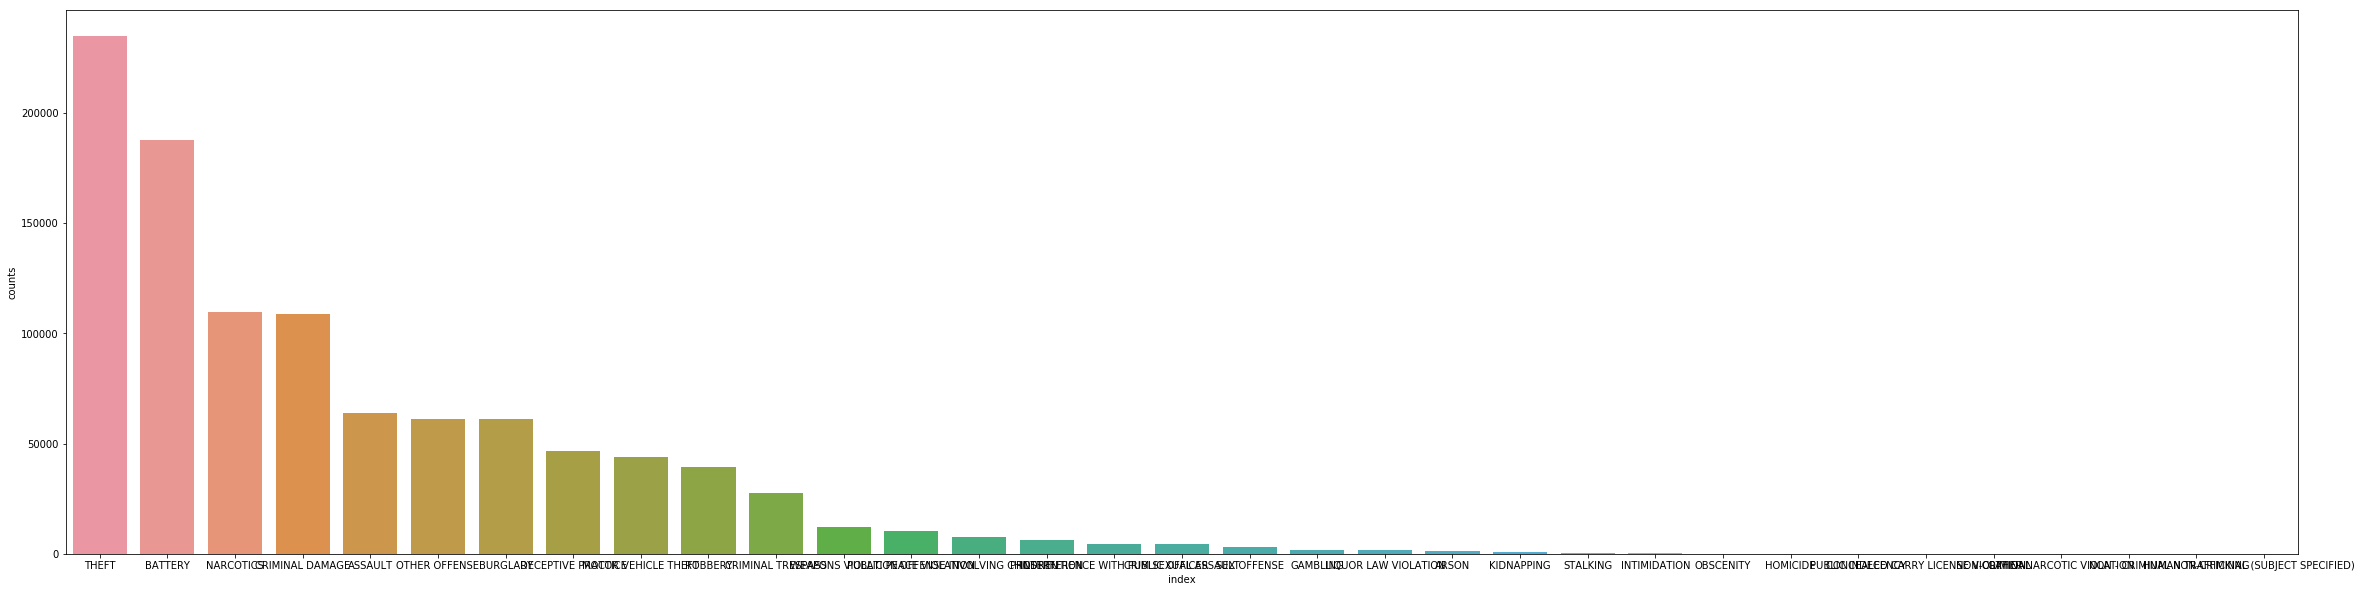

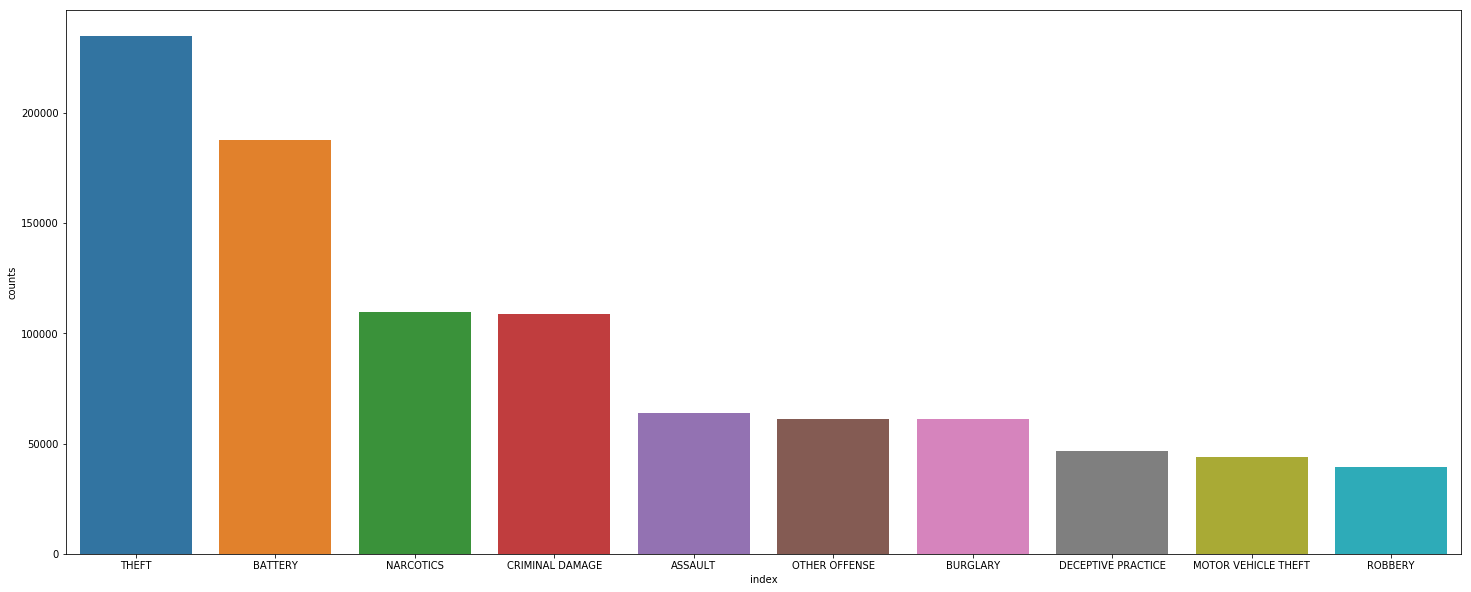

             index  counts
0            THEFT  234716
1          BATTERY  187643
2        NARCOTICS  109714
3  CRIMINAL DAMAGE  108508
4          ASSAULT   63675


In [90]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
count_crime = pd.DataFrame(data['Primary_Type'].value_counts().rename('counts').reset_index())
plt.figure(figsize=(40,10))
sns.barplot(x='index',y='counts',data=count_crime)
plt.show()
#For clearler graph
plt.figure(figsize=(25,10))
sns.barplot(x='index',y='counts',data=count_crime.iloc[:10,:])
plt.show()
print(count_crime.head())

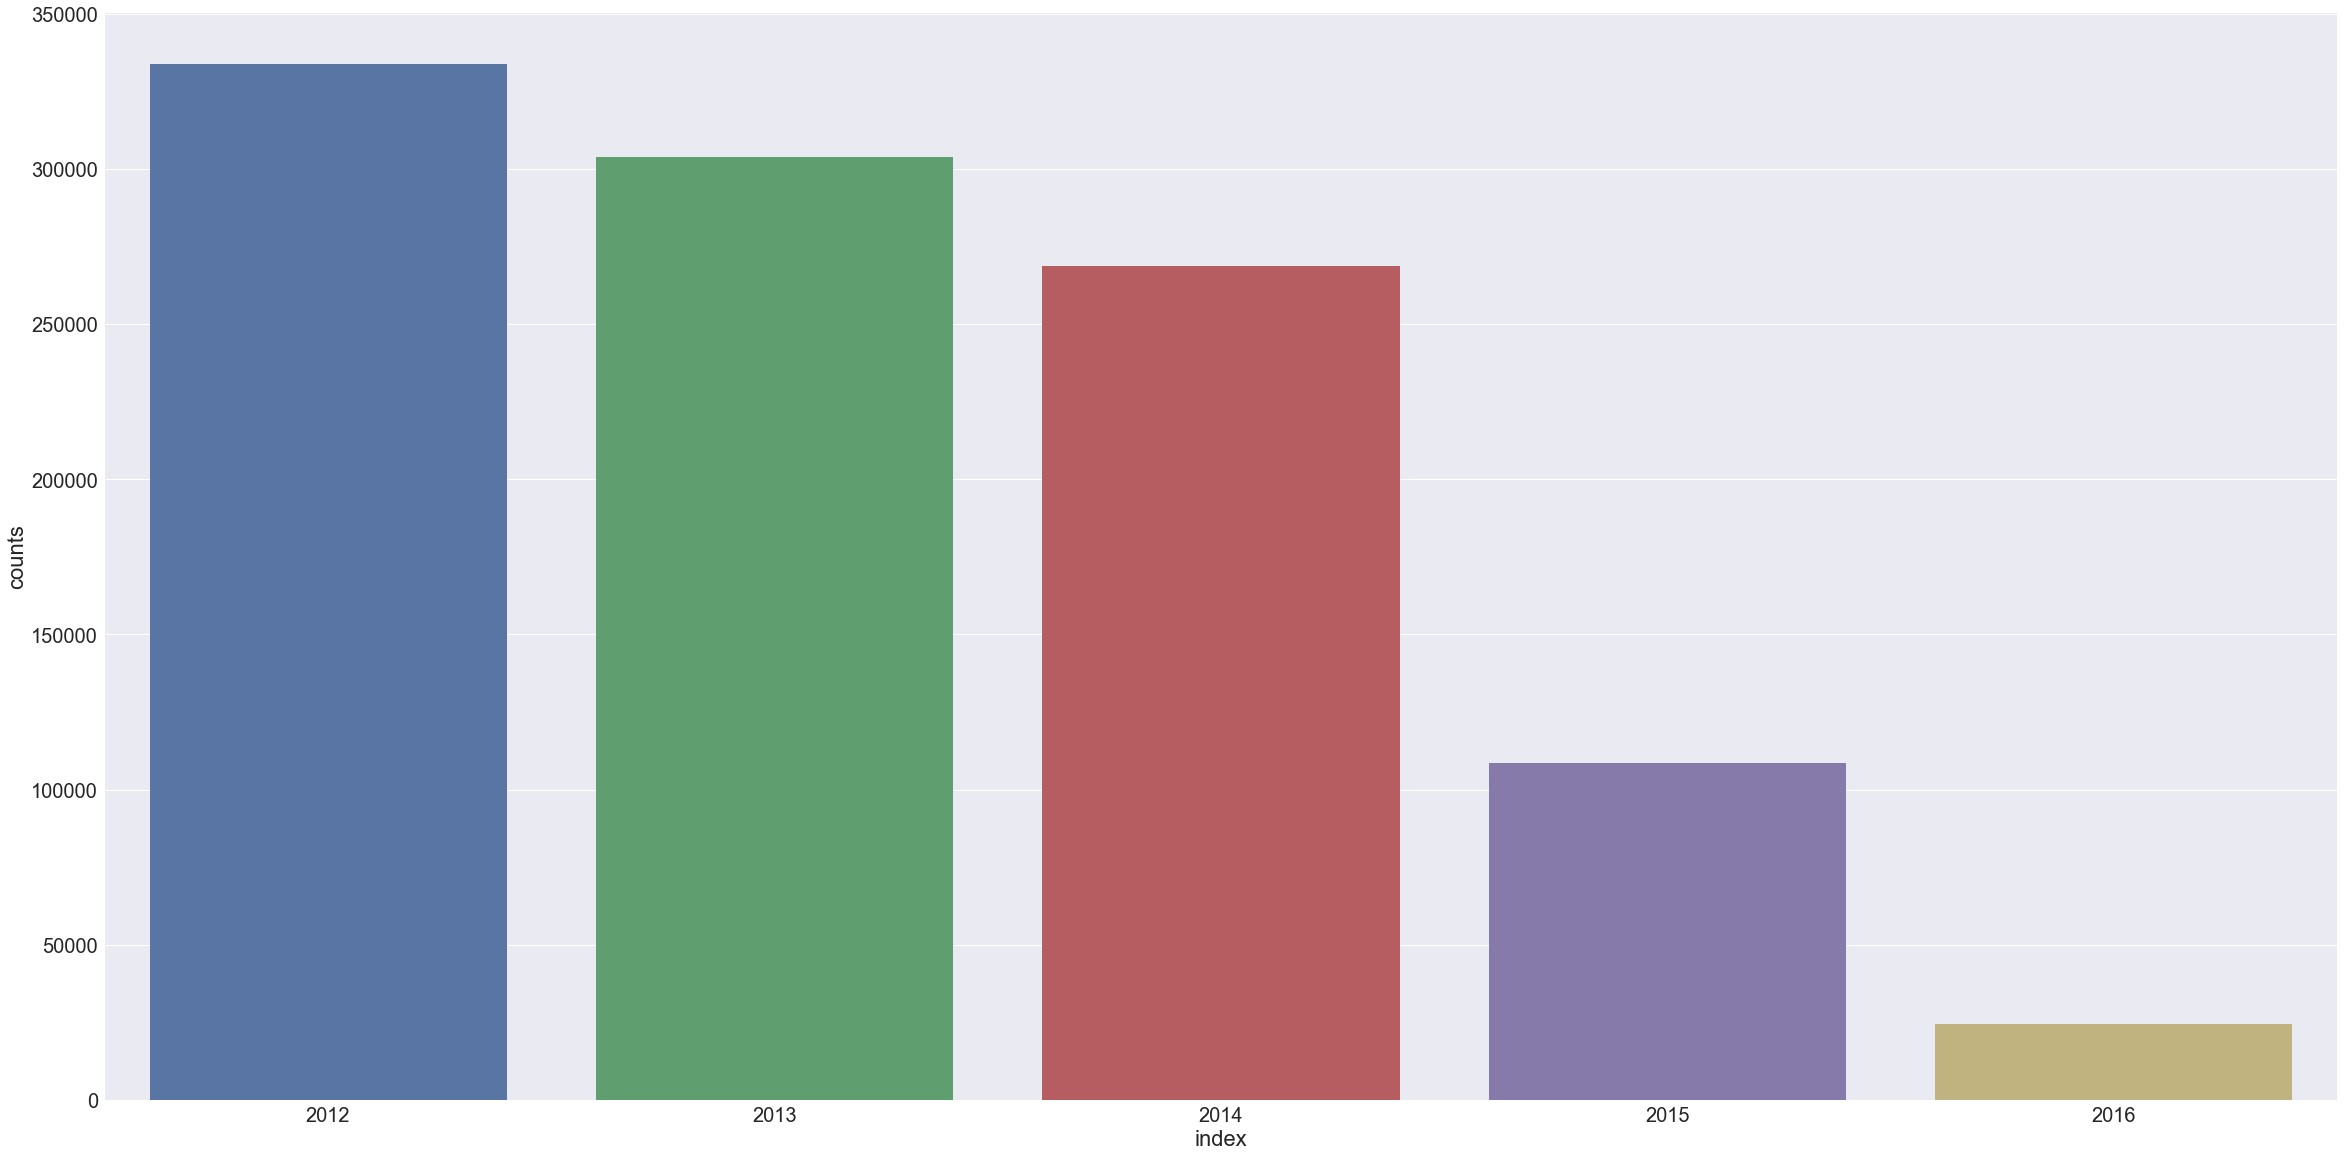

In [95]:
count_crime_year = pd.DataFrame(data['Year'].value_counts().rename('counts').reset_index())
plt.figure(figsize=(40,20))
sns.set(font_scale=2)
sns.barplot(x='index',y='counts',data=count_crime_year)
plt.show()
#For clearler graph
#plt.figure(figsize=(25,10))
#sns.barplot(x='index',y='counts',data=count_crime.iloc[:10,:])
#plt.show()
#print(count_crime.head())

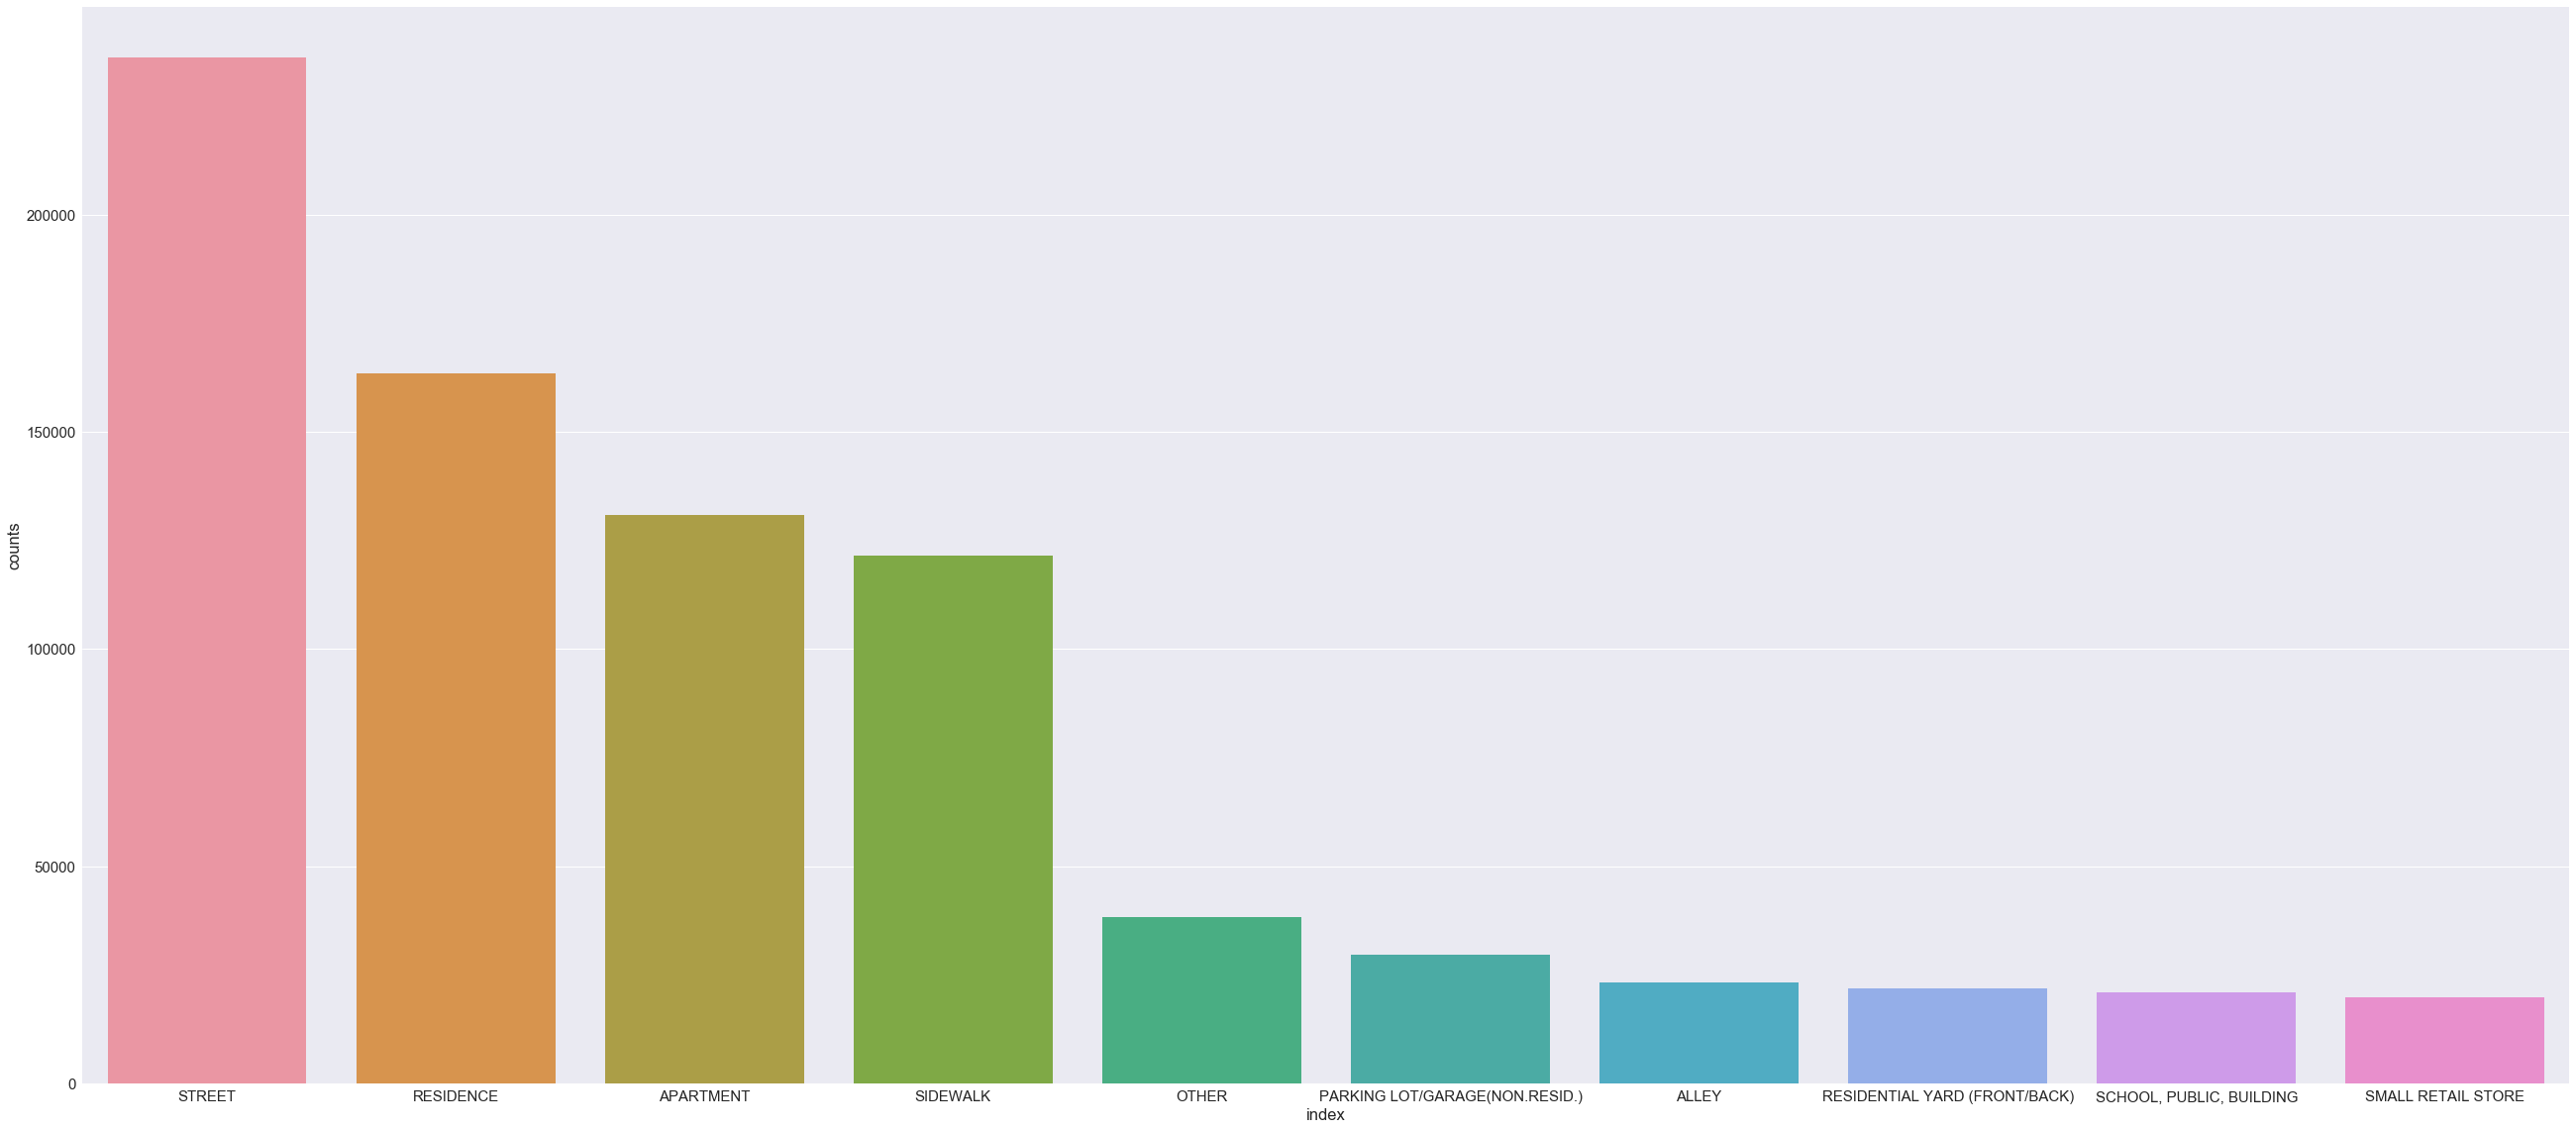

In [105]:
location_crime = pd.DataFrame(data['Location_Description'].value_counts().rename('counts').reset_index())
plt.figure(figsize=(45,20))
sns.set(font_scale=1.5)
sns.barplot(x='index',y='counts',data=location_crime.iloc[:10,:])
plt.show()

In [72]:
type(optimized_data['Year'])

pandas.core.series.Series

In [197]:
#plt.figure(figsize=(200,200))
#count_primary_location = pd.DataFrame({data['Primary_Type'].value_counts().rename('counts').reset_index(),data['Location_Description'].value_counts().rename('counts').reset_index()})
#plt.figure(figsize=(40,20))
#sns.set(font_scale=2)
#sns.barplot(x='index',y='counts',data=count_crime_year)
#plt.show()
#sns.set(font_scale=2)
#fig = plt.figure(figsize=(50,50))
#ax1 = fig.add_subplot(211)
#ax2 = fig.add_subplot(212)
count_primary = data.groupby( ["Location_Description","Primary_Type"]).size().reset_index(name="Count")
#print (count_primary)
location_wise_primary_crime = count_primary[count_primary.groupby(['Location_Description'])['Count'].transform(max)== count_primary['Count']]
#print(count_primary[idx])
#print(type(count_primary[idx]))
#data["Location_wise_Primary_Crime"]= location_wise_primary_crime.apply(lambda x :x)
print(location_wise_primary_crime)
#sns.pointplot(x='Count',y='Location_Description',data=count_primary,ax=ax1) 
#sns.pointplot(x='Count',y='Primary_Type',data=count_primary,ax=ax2)
#plt.show()

                                 Location_Description        Primary_Type  \
15                                 ABANDONED BUILDING           NARCOTICS   
35                                           AIRCRAFT               THEFT   
47    AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA               THEFT   
59        AIRPORT BUILDING NON-TERMINAL - SECURE AREA               THEFT   
74                 AIRPORT EXTERIOR - NON-SECURE AREA               THEFT   
85                     AIRPORT EXTERIOR - SECURE AREA               THEFT   
95                                AIRPORT PARKING LOT               THEFT   
99     AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA   CRIMINAL TRESPASS   
120        AIRPORT TERMINAL LOWER LEVEL - SECURE AREA               THEFT   
123      AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA               THEFT   
132    AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA               THEFT   
142        AIRPORT TERMINAL UPPER LEVEL - SECURE AREA       OTHER OFFENSE   

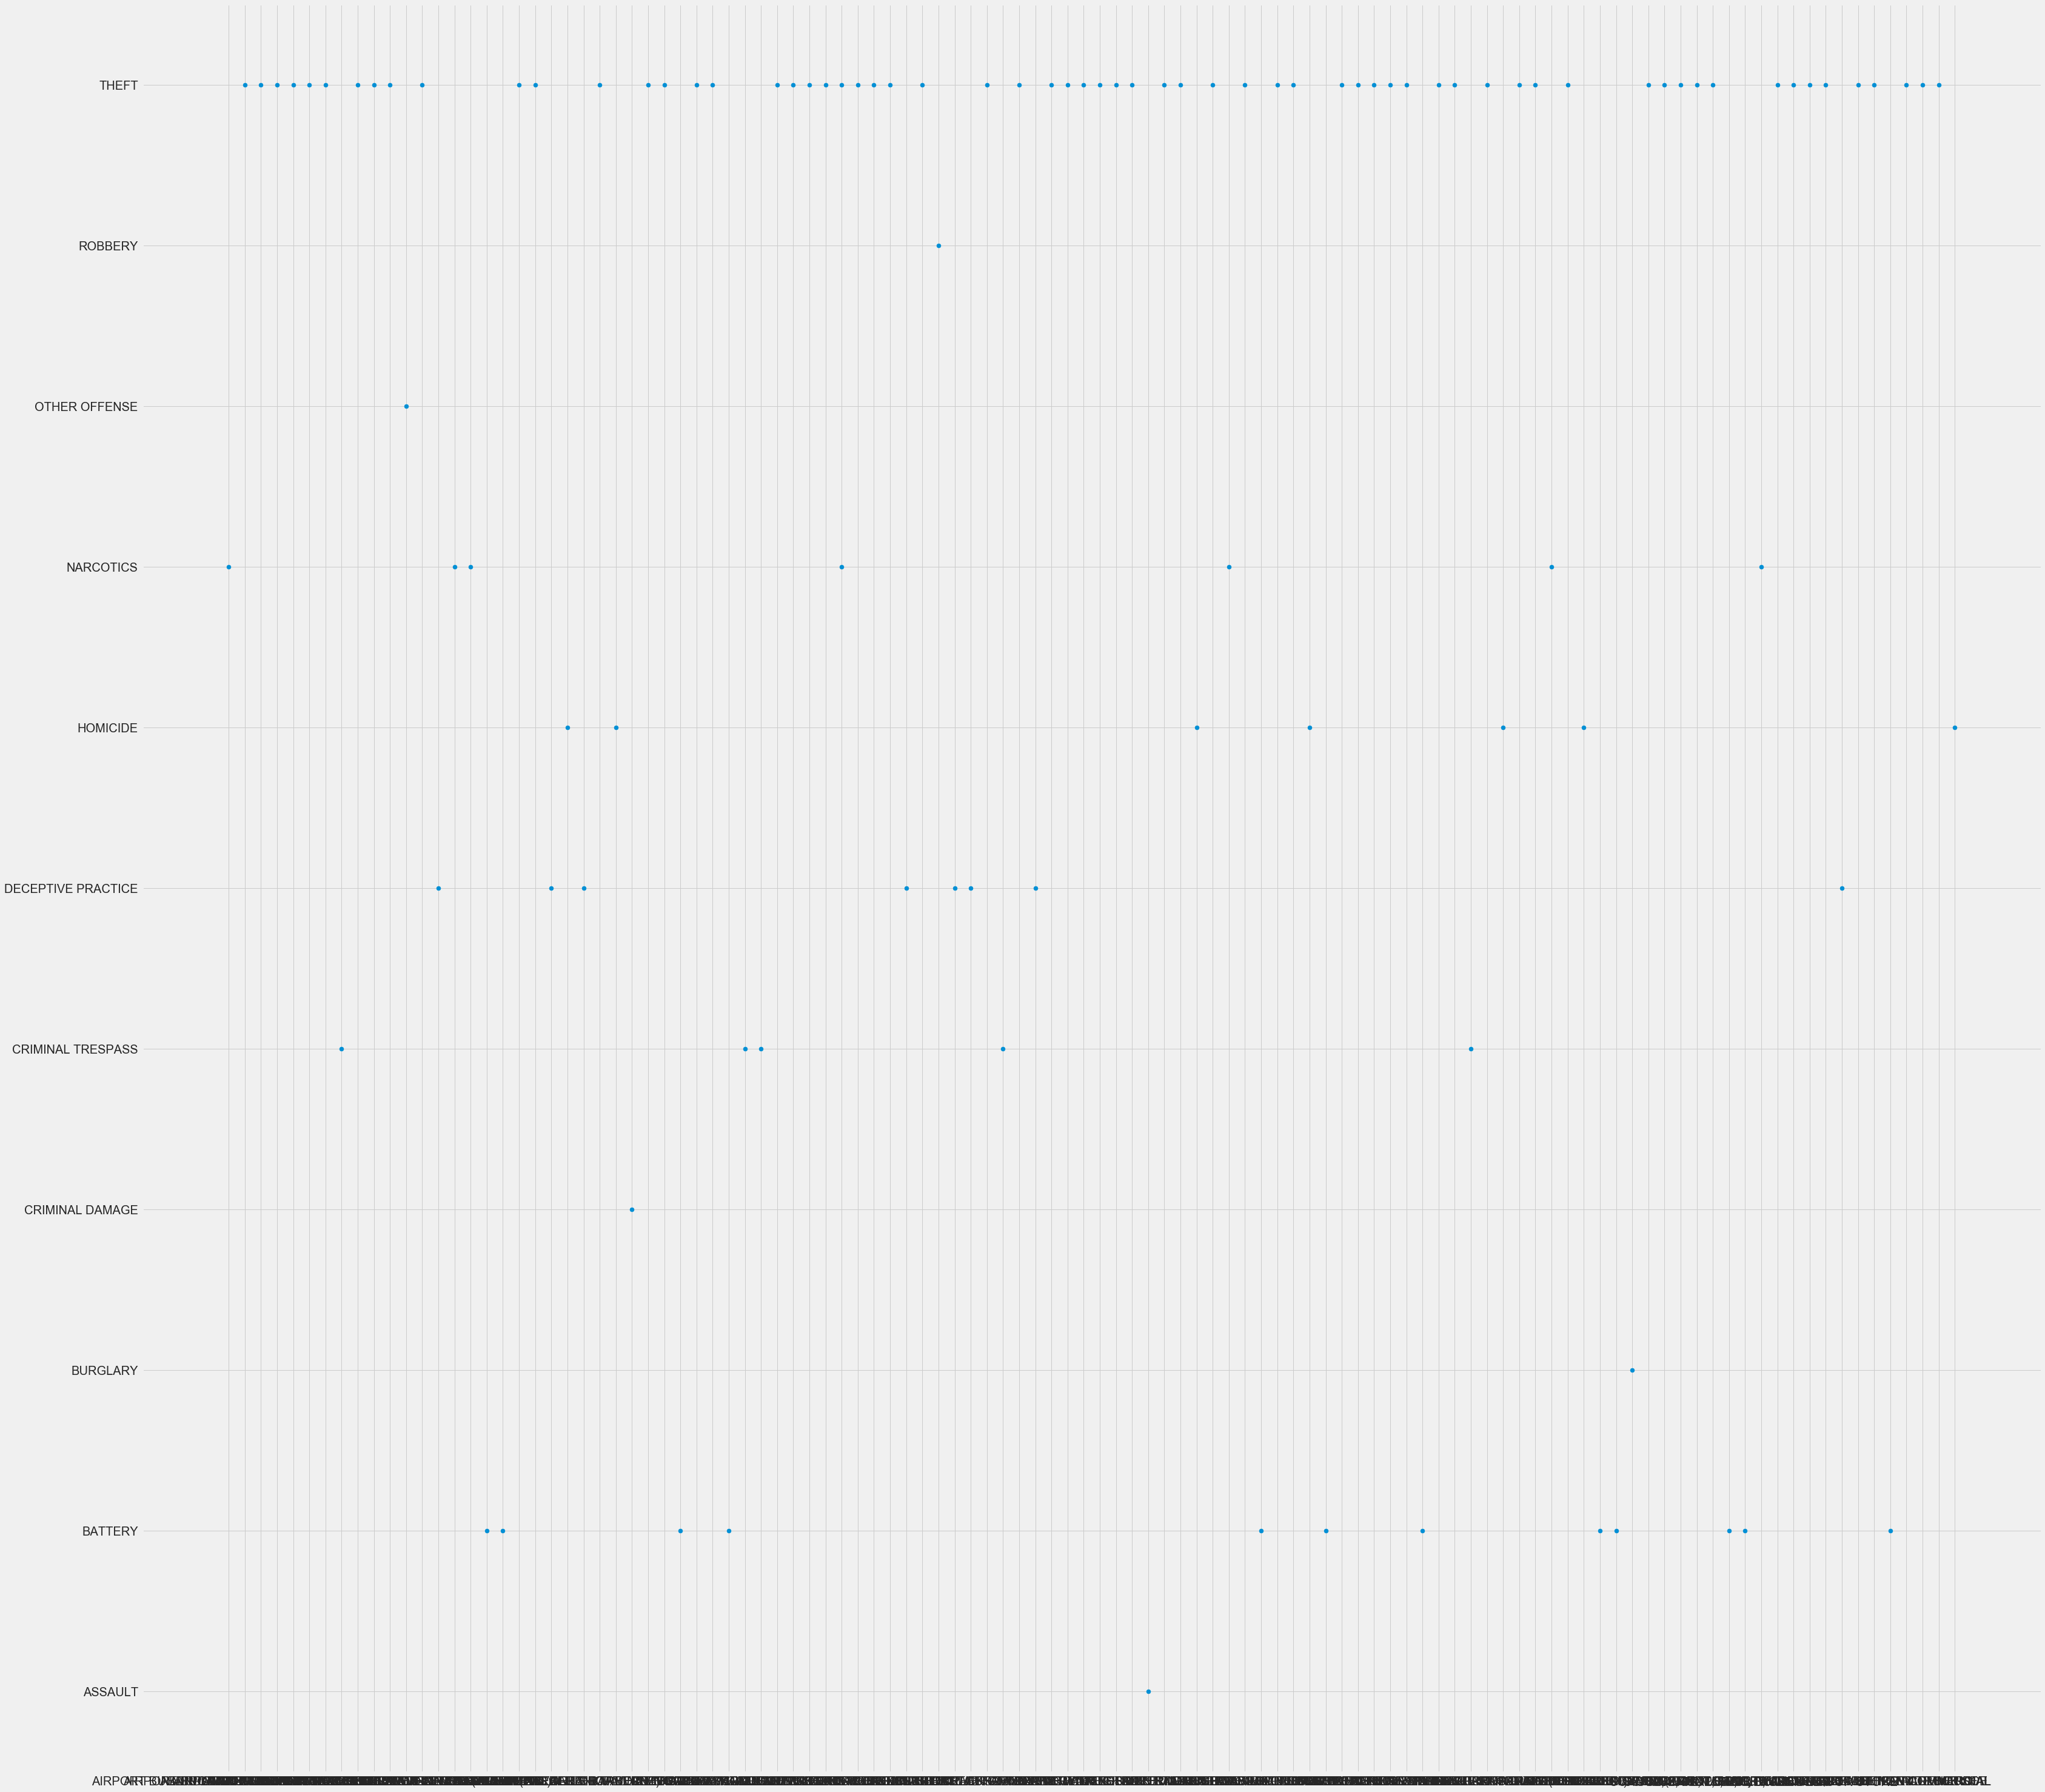

In [202]:
import itertools
import matplotlib.style as style
style.use('fivethirtyeight')
fig = plt.figure(figsize=(50,50))
#data.plot(location_wise_primary_crime['Count'], location_wise_primary_crime['Primary_Type'])
plt.scatter( location_wise_primary_crime['Location_Description'], location_wise_primary_crime['Primary_Type'])
#plt.xticks(location_wise_primary_crime['Count'], location_wise_primary_crime['Location_Description'] )
plt.show()
#marker = itertools.cycle((',', '+', '.', 'o', '*'))
#color = itertools.cycle(('b', 'g', 'r', 'c', 'm', 'y', 'k'))
#plot
#fig = plt.figure(figsize=(100,100))
#ax = fig.add_subplot(111)
#ax.plot(location_wise_primary_crime['Count'], location_wise_primary_crime['Primary_Type'], ls='', ms=10, mew=2)
#ax.plot(location_wise_primary_crime['Count'], location_wise_primary_crime['Location_Description'], ls='', ms=10, mew=2)

In [207]:
#The most common  

Location_Description    ABANDONED BUILDING
Primary_Type                     NARCOTICS
Count                                  846
Name: 15, dtype: object
Location_Description    AIRCRAFT
Primary_Type               THEFT
Count                        123
Name: 35, dtype: object
Location_Description    AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA
Primary_Type                                                      THEFT
Count                                                               158
Name: 47, dtype: object
Location_Description    AIRPORT BUILDING NON-TERMINAL - SECURE AREA
Primary_Type                                                  THEFT
Count                                                           141
Name: 59, dtype: object
Location_Description    AIRPORT EXTERIOR - NON-SECURE AREA
Primary_Type                                         THEFT
Count                                                   65
Name: 74, dtype: object
Location_Description    AIRPORT EXTERIOR - SECURE AREA
